In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [253]:
df = pd.read_csv("ad_click_dataset.csv")
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [254]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB
None


In [255]:
df.dropna(inplace=True)

In [256]:
print(df.isnull().sum())


id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64


In [257]:
print(df.describe(include='all'))


                  id full_name         age  gender device_type ad_position  \
count     816.000000       816  816.000000     816         816         816   
unique           NaN       440         NaN       3           3           3   
top              NaN  User8726         NaN  Female     Desktop      Bottom   
freq             NaN         8         NaN     301         293         283   
mean     5068.573529       NaN   41.250000     NaN         NaN         NaN   
std      2821.368389       NaN   13.046825     NaN         NaN         NaN   
min        18.000000       NaN   18.000000     NaN         NaN         NaN   
25%      2542.000000       NaN   30.000000     NaN         NaN         NaN   
50%      5291.500000       NaN   41.000000     NaN         NaN         NaN   
75%      7350.750000       NaN   53.000000     NaN         NaN         NaN   
max     10000.000000       NaN   64.000000     NaN         NaN         NaN   

       browsing_history time_of_day       click  
count        

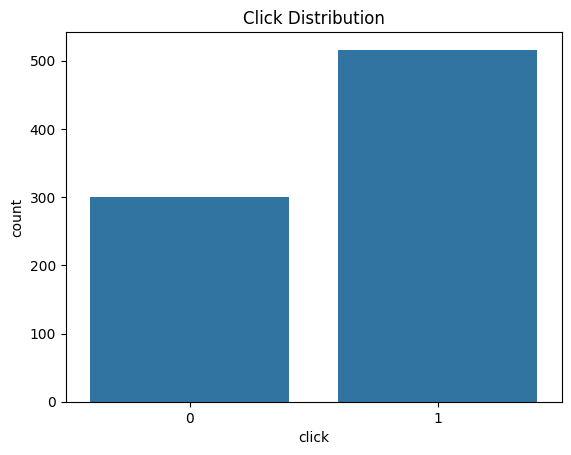

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='click', data=df)
plt.title("Click Distribution")
plt.show()


In [259]:
print(df['click'].value_counts(normalize=True))


click
1    0.632353
0    0.367647
Name: proportion, dtype: float64


In [260]:
df.drop(columns=['id', 'full_name'], inplace=True)


In [261]:
# Fill missing numerical
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing categorical
for col in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\cheta\AppData\Local\Temp\ipykernel_16376\697577867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\cheta\AppData\Local\Temp\ipykernel_16376\697577867.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [262]:
# Label Encoding for categorical columns
label_cols = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])


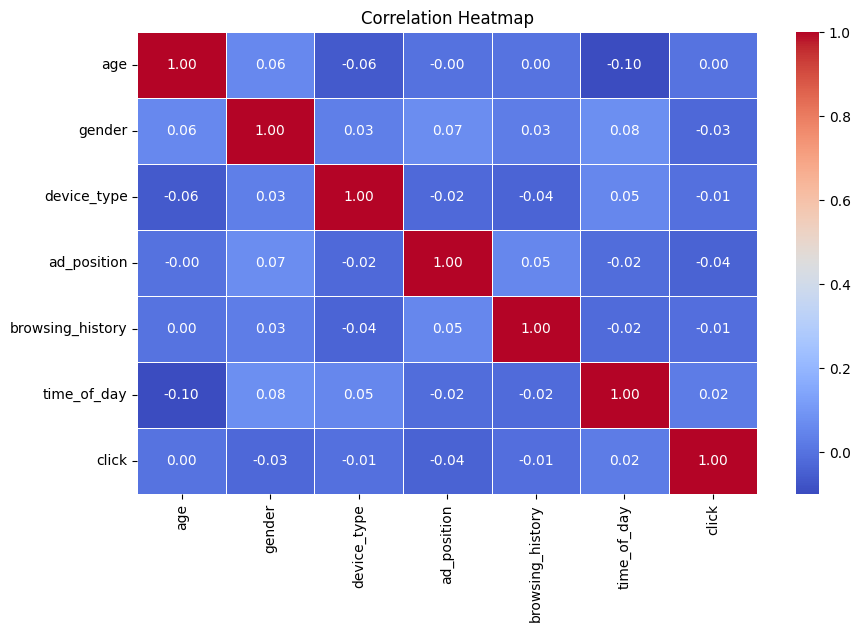

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix only for numeric columns
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [265]:
X = df[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y = df['click']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [267]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8048780487804879
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71        64
           1       0.79      0.92      0.85       100

    accuracy                           0.80       164
   macro avg       0.81      0.77      0.78       164
weighted avg       0.81      0.80      0.80       164



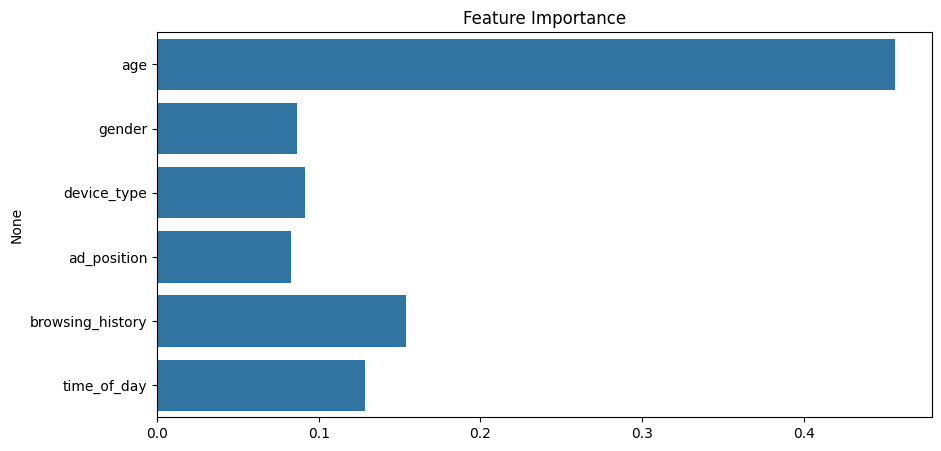

In [268]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [269]:
print(features)

Index(['age', 'gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object')
